Average Evaluation Metrics:
accuracy         90.083471
completeness     86.178753
effectiveness    79.982540
dtype: float64


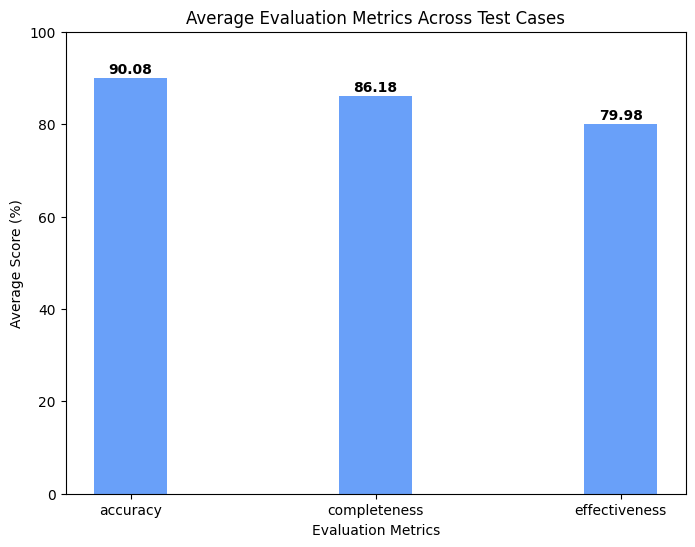

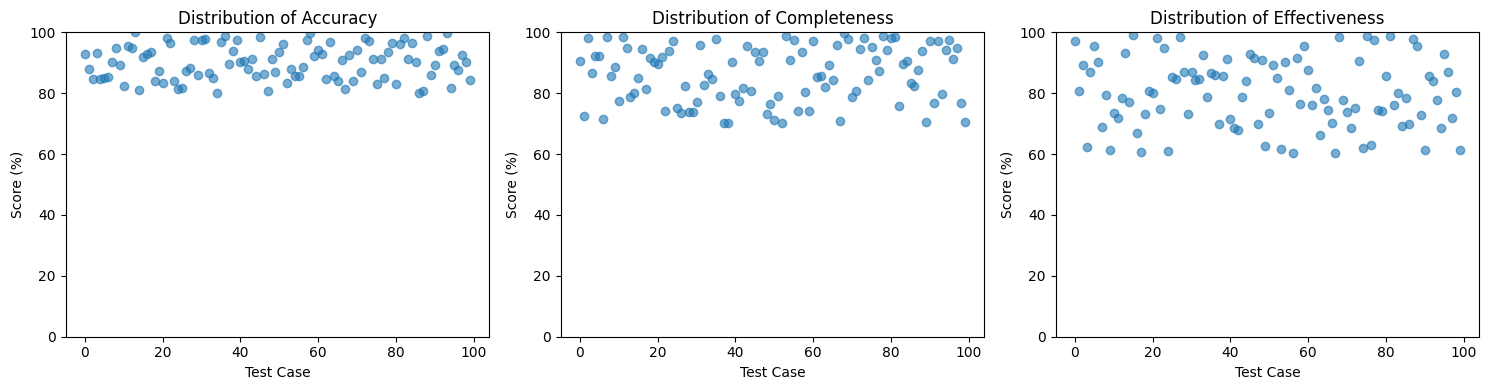

In [8]:
import random
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------
# Define a Test Case structure
# -------------------------------
class TestCase:
    def __init__(self, user_query, query_intent, query_output, agent_response):
        self.user_query = user_query
        self.query_intent = query_intent
        self.query_output = query_output
        self.agent_response = agent_response
        # Simulated evaluation scores (in percentage)
        self.accuracy = random.uniform(80, 100)
        self.completeness = random.uniform(70, 100)
        self.effectiveness = random.uniform(60, 100)

# -------------------------------
# Module A: Data Ingestion
# -------------------------------
def ingest_test_cases(num_cases=100):
    """
    Simulate ingestion of test cases.
    Each test case has fixed query details and a simulated agent response,
    with evaluation scores generated randomly.
    """
    test_cases = []
    for _ in range(num_cases):
        user_query = (
            "SELECT AVG(pages) AS avg_pages, MAX(pages) AS max_pages, MIN(pages) AS min_pages "
            "FROM sandbox_app_library;"
        )
        query_intent = "Aggregate statistics from the Library table"
        query_output = {
            "columns": ["avg_pages", "max_pages", "min_pages"],
            "rows": [(575.12, 957, 111)]
        }
        agent_response = {
            "response": (
                "The query output correctly aggregates the statistics from the Library table, "
                "providing the average, maximum, and minimum number of pages."
            ),
            "appreciation": (
                "Your query was about aggregating statistics from the Library table. "
                "The output provided includes the required fields which are essential for such an aggregate query."
            ),
            "insights": (
                "While the output is accurate, if the user requires the actual number of pages instead of counts, "
                "that could be an enhancement."
            )
        }
        tc = TestCase(user_query, query_intent, query_output, agent_response)
        test_cases.append(tc)
    return test_cases

# -------------------------------
# Module B: Test Case Parser & Evaluation Engine
# -------------------------------
def evaluate_test_cases(test_cases):
    """
    Simulate evaluation of test cases.
    In a real scenario, here you would use an LLM to evaluate each test case.
    """
    results = []
    for tc in test_cases:
        results.append({
            "accuracy": tc.accuracy,
            "completeness": tc.completeness,
            "effectiveness": tc.effectiveness
        })
    return results

# -------------------------------
# Module C: Metrics Aggregation and Analysis
# -------------------------------
def aggregate_metrics(results):
    """
    Aggregate evaluation metrics from all test cases.
    """
    df = pd.DataFrame(results)
    averages = df.mean()
    return averages, df

# -------------------------------
# Module D: Reporting and Visualization
# -------------------------------
def generate_graph(averages, df):
    """
    Generate graphs:
      1. A bar chart showing the average evaluation scores.
      2. Scatter plots for the distribution of each metric.
    """
    metrics = ["accuracy", "completeness", "effectiveness"]
    avg_values = [averages[metric] for metric in metrics]
    
    # Bar chart for average scores
    plt.figure(figsize=(8, 6))
    bars = plt.bar(metrics, avg_values, width=0.3, color='#69A0F9')
    plt.xlabel("Evaluation Metrics")
    plt.ylabel("Average Score (%)")
    plt.title("Average Evaluation Metrics Across Test Cases")
    plt.ylim(0, 100)
    # Annotate bar chart with values
    for bar, value in zip(bars, avg_values):
        plt.text(bar.get_x() + bar.get_width()/2, value + 1, f"{value:.2f}", ha='center', fontweight='bold')
    plt.savefig("sandbox-LLM-2.png", dpi=300, bbox_inches='tight')
    plt.show()
    

    # Scatter plots for each metric distribution
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    for i, metric in enumerate(metrics):
        axs[i].scatter(range(len(df)), df[metric], alpha=0.6)
        axs[i].set_title(f"Distribution of {metric.capitalize()}")
        axs[i].set_xlabel("Test Case")
        axs[i].set_ylabel("Score (%)")
        axs[i].set_ylim(0, 100)
    plt.tight_layout()
    plt.savefig("sandbox-LLM.png", dpi=300, bbox_inches='tight')
    plt.show()
"""#69C4F9')
bars2 = ax.bar(x - 0.5*bar_width, accuracy["Ensemble"], bar_width, color='#69A0F9')
bars3 = ax.bar(x + 0.5*bar_width, accuracy["TF-IDF"], bar_width, color='#C269F9')
bars4 = ax.bar(x + 1.5*bar_width, accuracy["BOW"], bar_width, color='#7A69F9')"""
# -------------------------------
# Main Workflow
# -------------------------------
def main():
    # Ingest test cases
    test_cases = ingest_test_cases(num_cases=100)
    # Evaluate test cases (simulate LLM evaluation)
    results = evaluate_test_cases(test_cases)
    # Aggregate metrics
    averages, df = aggregate_metrics(results)
    
    # Print aggregated average scores
    print("Average Evaluation Metrics:")
    print(averages)
    
    # Generate graphs to visualize the results
    generate_graph(averages, df)

if __name__ == '__main__':
    main()

In [33]:
import pandas as pd

# Specify the file path
file_path = "sandbox_results.xlsx"  # Change this to the actual file path

df = pd.read_excel(file_path, header=0)  # Forces first row to be column headers

# Print column names to verify
print("Columns in DataFrame:", df.columns.tolist())

# Check if the first row is correct
print(df.head())  # Print


Columns in DataFrame: ['query', 'intent', 'output', 'intent:query']
                                               query  \
0  SELECT AVG(pages) AS avg_pages, MAX(pages) AS ...   
1  SELECT title, author, publication_year \nFROM ...   
2  SELECT genre, AVG(pages) AS avg_pages \nFROM s...   
3  SELECT genre, COUNT(*) AS total_books \nFROM s...   
4  SELECT title, author, publication_year \nFROM ...   

                                              intent  \
0  Retrieve the average, maximum, and minimum num...   
1  Retrieve all books that were published before ...   
2  Calculate the average number of pages in books...   
3  Get the total number of books available in eac...   
4  Retrieve the most recently published book in t...   

                                              output intent:query  
0  {\n  "status": "success",\n  "data": {\n    "c...          yes  
1  {\n  "status": "success",\n  "data": {\n    "c...          yes  
2  {\n  "status": "success",\n  "data": {\n    "c...  

In [34]:
if df.iloc[0]["intent:query"] == "intent:query":  # Check if first row is incorrect
    df = df.iloc[1:].reset_index(drop=True)  # Drop and reset index

In [35]:
if df.iloc[0]["intent:query"] == "intent:query":  # Check if first row is incorrect
    df = df.iloc[1:].reset_index(drop=True)  # Drop and reset index

Accuracy: 81.82%
Recall: 94.12%

Results saved to deepseek_llm_relevance_results.csv


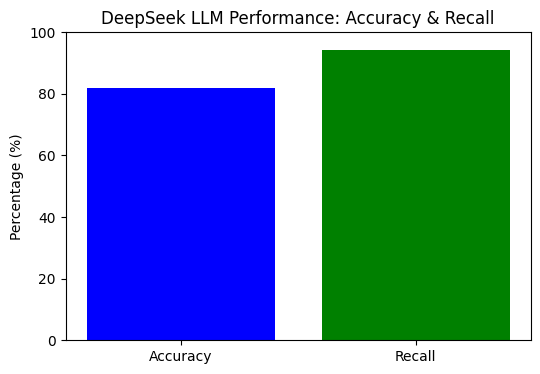


Final LLM Classification Results:
                                               query  \
0  SELECT AVG(pages) AS avg_pages, MAX(pages) AS ...   
1  SELECT title, author, publication_year \nFROM ...   
2  SELECT genre, AVG(pages) AS avg_pages \nFROM s...   
3  SELECT genre, COUNT(*) AS total_books \nFROM s...   
4  SELECT title, author, publication_year \nFROM ...   

                                              intent  \
0  Retrieve the average, maximum, and minimum num...   
1  Retrieve all books that were published before ...   
2  Calculate the average number of pages in books...   
3  Get the total number of books available in eac...   
4  Retrieve the most recently published book in t...   

                                              output  \
0  {\n  "status": "success",\n  "data": {\n    "c...   
1  {\n  "status": "success",\n  "data": {\n    "c...   
2  {\n  "status": "success",\n  "data": {\n    "c...   
3  {\n  "status": "success",\n  "data": {\n    "c...   
4  {\n  "st

In [41]:
import pandas as pd
import ollama
import matplotlib.pyplot as plt
# Function to classify if the query is relevant to the intent using DeepSeek in Ollama
def check_relevance_ollama(query, intent, output):
    prompt = f"""
    You are an AI specialized in SQL query classification. 
    Determine whether the following SQL query is relevant to the given intent.

    Intent: {intent}
    Query: {query}

    SQL Execution Output: {output}

    Reply with only 'yes' or 'no' at the end.
    """
    
    response = ollama.chat(model="deepseek-r1:1.5b", messages=[{"role": "user", "content": prompt}])
    
    # Extract response text and normalize case
    full_response = response['message']['content'].strip()
    prediction = "yes" if "yes" in full_response.lower() else "no"

    return full_response, prediction

# Apply DeepSeek to check relevance and store full response
df[["Full_Response", "LLM_Prediction"]] = df.apply(
    lambda row: pd.Series(check_relevance_ollama(row["query"], row["intent"], row["output"])), axis=1
)

# Normalize 'intent:query' column to lowercase
df["intent:query"] = df["intent:query"].str.lower().str.strip()

# Compute Accuracy
df["Correct"] = df["LLM_Prediction"] == df["intent:query"]
accuracy = (df["Correct"] == True).mean() * 100  # Accuracy in percentage

# Compute Recall
TP = ((df["LLM_Prediction"] == "yes") & (df["intent:query"] == "yes")).sum()  # True Positives
FN = ((df["LLM_Prediction"] == "no") & (df["intent:query"] == "yes")).sum()  # False Negatives
recall = (TP / (TP + FN)) * 100 if (TP + FN) > 0 else 0  # Avoid division by zero

# Print Metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Recall: {recall:.2f}%")

# Store results in a new DataFrame
results_df = df[["query", "intent", "output", "Full_Response", "LLM_Prediction", "intent:query", "Correct"]]

# Save the DataFrame to a CSV file
csv_filename = "deepseek_llm_relevance_results.csv"
results_df.to_csv(csv_filename, index=False)

print(f"\nResults saved to {csv_filename}")

# Plot Accuracy and Recall
plt.figure(figsize=(6, 4))
plt.bar(["Accuracy", "Recall"], [accuracy, recall], color=['blue', 'green'])
plt.ylim(0, 100)
plt.ylabel("Percentage (%)")
plt.title("DeepSeek LLM Performance: Accuracy & Recall")
plt.show()

# Display the first few rows for verification
print("\nFinal LLM Classification Results:")
print(results_df.head())  # Display first few rows



In [46]:
# Function to classify if the query is relevant to the intent using DeepSeek in Ollama
def check_relevance_ollama(query, intent):
    prompt = f"""
    You are an AI specialized in SQL query classification. 
    Determine whether the following SQL query is relevant to the given intent.

    Intent: {intent}
    Query: {query}

    Reply with only 'yes' or 'no' at the end.
    """
    
    response = ollama.chat(model="deepseek-r1:1.5b", messages=[{"role": "user", "content": prompt}])
    
    # Extract response text and normalize case
    full_response = response['message']['content'].strip()
    prediction = "yes" if "yes" in full_response.lower() else "no"

    return full_response, prediction

# Apply DeepSeek to check relevance and store full response
df[["Full_Response", "LLM_Prediction"]] = df.apply(
    lambda row: pd.Series(check_relevance_ollama(row["query"], row["intent"])), axis=1
)

# Normalize 'intent:query' column
df["intent:query"] = df["intent:query"].str.lower().str.strip()

# Store required columns, including intent:query
results_df = df[["query", "intent", "LLM_Prediction", "Full_Response", "intent:query"]]

# Save the DataFrame to an Excel file
excel_filename = "deepseek_llm_results.xlsx"
results_df.to_excel(excel_filename, index=False, engine='openpyxl')

print(f"\nResults saved to {excel_filename}")

# Display first few rows for verification
print("\nFinal LLM Classification Results:")
print(results_df.head())  # ✅ Display results


Results saved to deepseek_llm_results.xlsx

Final LLM Classification Results:
                                               query  \
0  SELECT AVG(pages) AS avg_pages, MAX(pages) AS ...   
1  SELECT title, author, publication_year \nFROM ...   
2  SELECT genre, AVG(pages) AS avg_pages \nFROM s...   
3  SELECT genre, COUNT(*) AS total_books \nFROM s...   
4  SELECT title, author, publication_year \nFROM ...   

                                              intent LLM_Prediction  \
0  Retrieve the average, maximum, and minimum num...            yes   
1  Retrieve all books that were published before ...            yes   
2  Calculate the average number of pages in books...            yes   
3  Get the total number of books available in eac...            yes   
4  Retrieve the most recently published book in t...            yes   

                                       Full_Response intent:query  
0  <think>\nOkay, so I need to figure out if the ...          yes  
1  <think>\nOkay, so 